## Gesture UI Project 1 - 2024
### By Ronan Noonan student number G00384824 
### Atlantic Technological University 
<hr>

## Introduction
This project involves loading and preparing vehicle sensor datasets to compare different classification algorithms. The data, taken from Opel Corsa and Peugeot 207 vehicles, will be used to predict driving style based on various features captured by the vehicle's sensors.

In [186]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

## Load Datasets
Loading data for Opel Corsa and Peugeot 207 from four CSV files. The datasets contain sensor data recorded from two separate journeys for each vehicle type.

In [187]:
# Load Datasets
opel_corsa_01 = pd.read_csv('./DataSets/opel_corsa_01.csv', delimiter=';')
opel_corsa_02 = pd.read_csv('./DataSets/opel_corsa_02.csv', delimiter=';')
peugeot_207_01 = pd.read_csv('./DataSets/peugeot_207_01.csv', delimiter=';')
peugeot_207_02 = pd.read_csv('./DataSets/peugeot_207_02.csv', delimiter=';')


<a href="https://dev.to/jaynwabueze/mastering-data-preprocessing-for-machine-learning-in-python-a-comprehensive-guide-1bdh" style="color: black;">**(1) Mastering Data Preprocessing for Machine Learning in Python** _Jay Codes on DEV Community_</a>

A StandardScaler instance is initialized for future scaling

In [188]:
# Initialize the StandardScaler
scaler = StandardScaler()

## Missing Values
Before processing the data further, it's crucial to identify and address any missing values within the datasets.

In [189]:
# Check for missing values across all datasets
print("Missing Values in Opel Corsa 01:\n", opel_corsa_01.isnull().sum())
print("Missing Values in Opel Corsa 02:\n", opel_corsa_02.isnull().sum())
print("Missing Values in Peugeot 207 01:\n", peugeot_207_01.isnull().sum())
print("Missing Values in Peugeot 207 02:\n", peugeot_207_02.isnull().sum())

Missing Values in Opel Corsa 01:
 Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64
Missing Values in Opel Corsa 02:
 Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow         

## Handling Missing Value
Fill missing values with the mean for each dataset, preparing the datasets for future analysis.

In [190]:
# Calculate the mean only for numeric columns and fill missing values
numeric_cols_opel_corsa_01 = opel_corsa_01.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_opel_corsa_02 = opel_corsa_02.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_peugeot_207_01 = peugeot_207_01.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_peugeot_207_02 = peugeot_207_02.select_dtypes(include=['float64', 'int64']).columns

opel_corsa_01[numeric_cols_opel_corsa_01] = opel_corsa_01[numeric_cols_opel_corsa_01].fillna(opel_corsa_01[numeric_cols_opel_corsa_01].mean())
opel_corsa_02[numeric_cols_opel_corsa_02] = opel_corsa_02[numeric_cols_opel_corsa_02].fillna(opel_corsa_02[numeric_cols_opel_corsa_02].mean())
peugeot_207_01[numeric_cols_peugeot_207_01] = peugeot_207_01[numeric_cols_peugeot_207_01].fillna(peugeot_207_01[numeric_cols_peugeot_207_01].mean())
peugeot_207_02[numeric_cols_peugeot_207_02] = peugeot_207_02[numeric_cols_peugeot_207_02].fillna(peugeot_207_02[numeric_cols_peugeot_207_02].mean())


<a href="https://dev.to/jaynwabueze/mastering-data-preprocessing-for-machine-learning-in-python-a-comprehensive-guide-1bdh" style="color: black;">**(1) Mastering Data Preprocessing for Machine Learning in Python** _Jay Codes on DEV Community_</a>

## Dataset Info
Checking structure and data types in Opel Corsa 01.

In [191]:
# Dataset Info for Opel Corsa 01
print("Dataset Info for Opel Corsa 01:")
print(opel_corsa_01.info())

Dataset Info for Opel Corsa 01:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7038 non-null   int64  
 1   AltitudeVariation          7038 non-null   float64
 2   VehicleSpeedInstantaneous  7038 non-null   float64
 3   VehicleSpeedAverage        7038 non-null   float64
 4   VehicleSpeedVariance       7038 non-null   float64
 5   VehicleSpeedVariation      7038 non-null   float64
 6   LongitudinalAcceleration   7038 non-null   float64
 7   EngineLoad                 7038 non-null   float64
 8   EngineCoolantTemperature   7038 non-null   int64  
 9   ManifoldAbsolutePressure   7038 non-null   int64  
 10  EngineRPM                  7038 non-null   int64  
 11  MassAirFlow                7038 non-null   float64
 12  IntakeAirTemperature       7038 non-null   int64  
 13  VerticalAccelera

## Preview Data
First rows of Opel Corsa 01 to inspect data format and features.

In [192]:
# Preview Data for Opel Corsa 01
print("\nFirst few rows of Opel Corsa 01:")
print(opel_corsa_01.head())


First few rows of Opel Corsa 01:
   Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0          59          -2.299988                  25.670519   
1          60          -2.099976                  24.094259   
2          61          -1.500000                  22.743179   
3          62           0.100037                  22.292820   
4          63           0.099976                  23.643900   

   VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0            13.223501            121.592690              -2.476980   
1            13.638919            120.422571              -1.576260   
2            14.031043            118.456769              -1.351080   
3            14.171073            117.571308              -0.450359   
4            14.328954            117.074149               1.351080   

   LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
0                    0.3555    4.705883                        68   
1                    0

## Summary Stats
Showing the data's distribution, which is helpful for understanding the range and spread of the features.

In [193]:
# Display summary statistics for the numerical features of Opel Corsa 01
print(opel_corsa_01.describe())

        Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
count  7038.000000        7038.000000                7038.000000   
mean   3772.072748          -0.675845                  36.428319   
std    2118.196795           1.691601                  32.901312   
min      59.000000          -9.200012                   0.000000   
25%    1936.250000          -1.500000                   8.782019   
50%    3813.500000          -0.399963                  29.273399   
75%    5612.750000           0.100037                  54.043198   
max    7391.000000           5.200012                 124.749725   

       VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
count          7038.000000           7038.000000            7038.000000   
mean             36.723932            213.004353              -0.029563   
std              29.366391            205.717663               2.390997   
min               0.000000              0.000000             -17.789218   
25%         

## Feature Selection
Decide which features are relevant for predicting the target variable and separate them from the label.

In [194]:
# Opel Corsa 01

opel_corsa_01 = opel_corsa_01.drop(['Unnamed: 0'], axis=1)
opel_corsa_02 = opel_corsa_02.drop(['Unnamed: 0'], axis=1)
peugeot_207_01 = peugeot_207_01.drop(['Unnamed: 0'], axis=1)
peugeot_207_02 = peugeot_207_02.drop(['Unnamed: 0'], axis=1)


## Encoding Categorical Variables
The machine learning models require numerical input, so it's necessary to convert categorical variables into a format that can be provided to the models.

In [195]:
# One-hot encode categorical variables for each dataset
opel_corsa_01 = pd.get_dummies(opel_corsa_01, columns=['roadSurface', 'traffic'])
opel_corsa_02 = pd.get_dummies(opel_corsa_02, columns=['roadSurface', 'traffic'])
peugeot_207_01 = pd.get_dummies(peugeot_207_01, columns=['roadSurface', 'traffic'])
peugeot_207_02 = pd.get_dummies(peugeot_207_02, columns=['roadSurface', 'traffic'])

<a href="https://dev.to/jaynwabueze/mastering-data-preprocessing-for-machine-learning-in-python-a-comprehensive-guide-1bdh" style="color: black;">**(1) Mastering Data Preprocessing for Machine Learning in Python** _Jay Codes on DEV Community_</a>

### Next
Encode the target variable 'drivingStyle' for it to be used in the machine learning models.

In [196]:
# Encoding the 'drivingStyle' across all datasets
encoder = LabelEncoder()

datasets = [opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02]
for dataset in datasets:
    dataset['drivingStyle'] = encoder.fit_transform(dataset['drivingStyle'])

# Verifying the change
print(opel_corsa_01[['drivingStyle']].head())

   drivingStyle
0             1
1             1
2             1
3             1
4             1


In [197]:
datasets = [opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02]
dataset_names = ['Opel Corsa 01', 'Opel Corsa 02', 'Peugeot 207 01', 'Peugeot 207 02']

for name, dataset in zip(dataset_names, datasets):
    if 'drivingStyle' in dataset.columns:
        print(f"drivingStyle found in {name}")
    else:
        print(f"drivingStyle not found in {name}")


drivingStyle found in Opel Corsa 01
drivingStyle found in Opel Corsa 02
drivingStyle found in Peugeot 207 01
drivingStyle found in Peugeot 207 02


In [198]:

output_variable = 'drivingStyle'

In [199]:
# Convert 'Driving Style' into numeric codes across all datasets.
opel_corsa_01[output_variable] = opel_corsa_01[output_variable].astype('category').cat.codes
opel_corsa_02[output_variable] = opel_corsa_02[output_variable].astype('category').cat.codes
peugeot_207_01[output_variable] = peugeot_207_01[output_variable].astype('category').cat.codes
peugeot_207_02[output_variable] = peugeot_207_02[output_variable].astype('category').cat.codes

## Normalize/Standardize Features
Scale the numerical features to have a mean of 0 and a standard deviation of 1. This step is crucial for algorithms that are sensitive to feature scaling.

In [200]:
# Safely drop 'Unnamed: 0' column if it exists
datasets = [opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02]
for dataset in datasets:
    if 'Unnamed: 0' in dataset.columns:
        dataset.drop('Unnamed: 0', axis=1, inplace=True)

# Ensure 'drivingStyle' is not included in the numeric columns to be scaled
numeric_cols_opel_corsa_01 = opel_corsa_01.select_dtypes(include=['int64', 'float64']).columns.difference(['drivingStyle'])
numeric_cols_opel_corsa_02 = opel_corsa_02.select_dtypes(include=['int64', 'float64']).columns.difference(['drivingStyle'])
numeric_cols_peugeot_207_01 = peugeot_207_01.select_dtypes(include=['int64', 'float64']).columns.difference(['drivingStyle'])
numeric_cols_peugeot_207_02 = peugeot_207_02.select_dtypes(include=['int64', 'float64']).columns.difference(['drivingStyle'])

# Apply scaling to the numeric columns of each dataset using the correct columns
opel_corsa_01[numeric_cols_opel_corsa_01] = scaler.fit_transform(opel_corsa_01[numeric_cols_opel_corsa_01])
opel_corsa_02[numeric_cols_opel_corsa_02] = scaler.transform(opel_corsa_02[numeric_cols_opel_corsa_02])
peugeot_207_01[numeric_cols_peugeot_207_01] = scaler.transform(peugeot_207_01[numeric_cols_peugeot_207_01])
peugeot_207_02[numeric_cols_peugeot_207_02] = scaler.transform(peugeot_207_02[numeric_cols_peugeot_207_02])


## Data Visualization
visualizing the distribution of sensor data across the datasets using histograms.

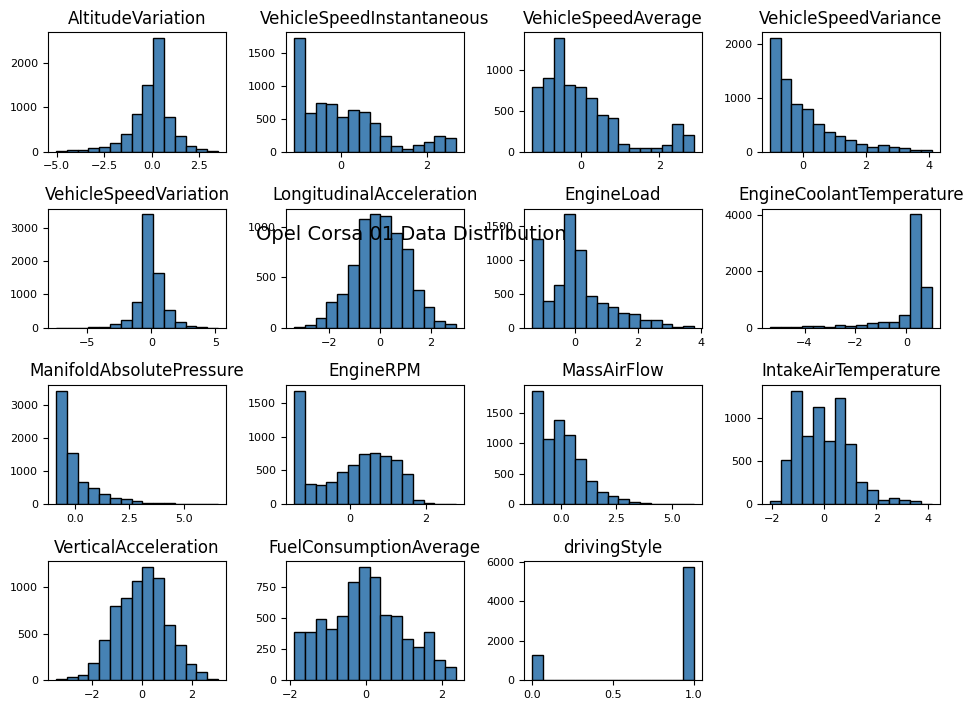

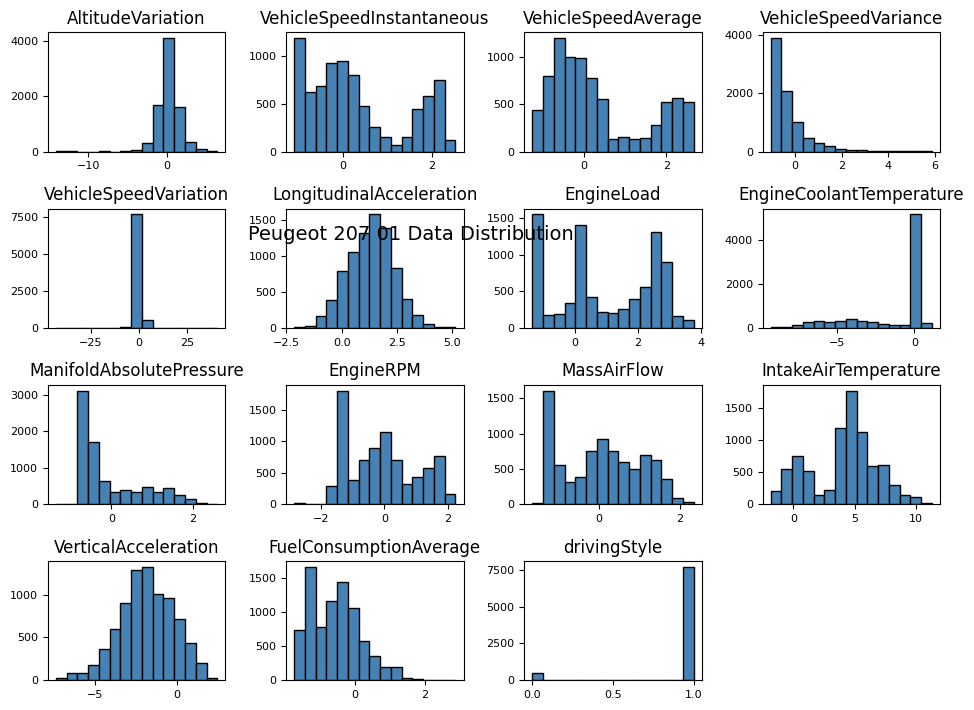

In [201]:
# Histograms for datasets
def plot_histograms(df, title):
    df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
            xlabelsize=8, ylabelsize=8, grid=False)
    plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.suptitle(title, x=0.65, y=1.02, ha='center', fontsize=14)
    plt.show()

plot_histograms(opel_corsa_01, 'Opel Corsa 01 Data Distribution')
plot_histograms(peugeot_207_01, 'Peugeot 207 01 Data Distribution')

<a href="https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/" style="color: black;">**(2) Plotting Histogram in Python using Matplotlib** _GeeksForGeeks_</a>

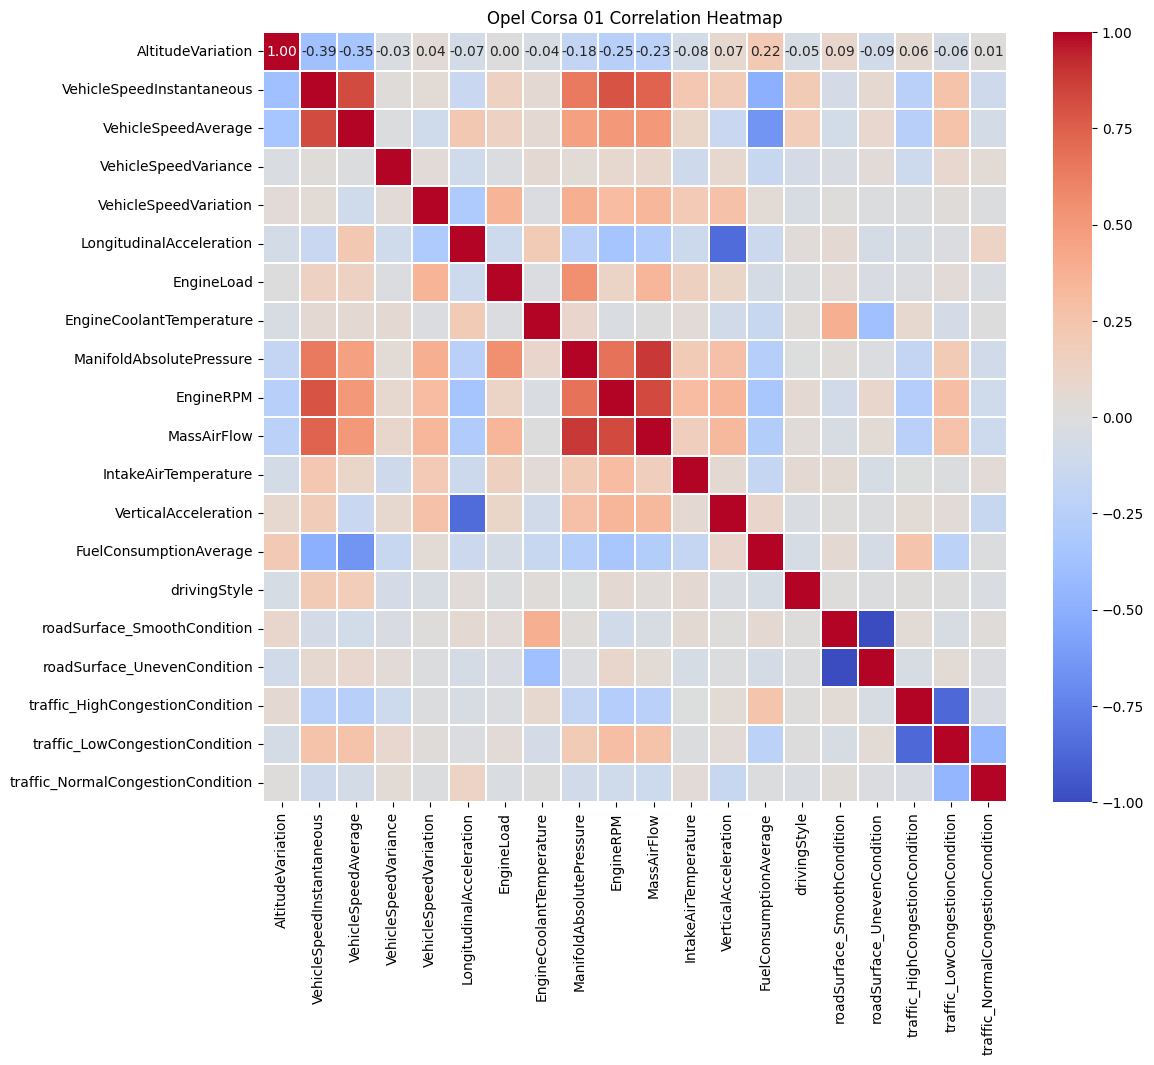

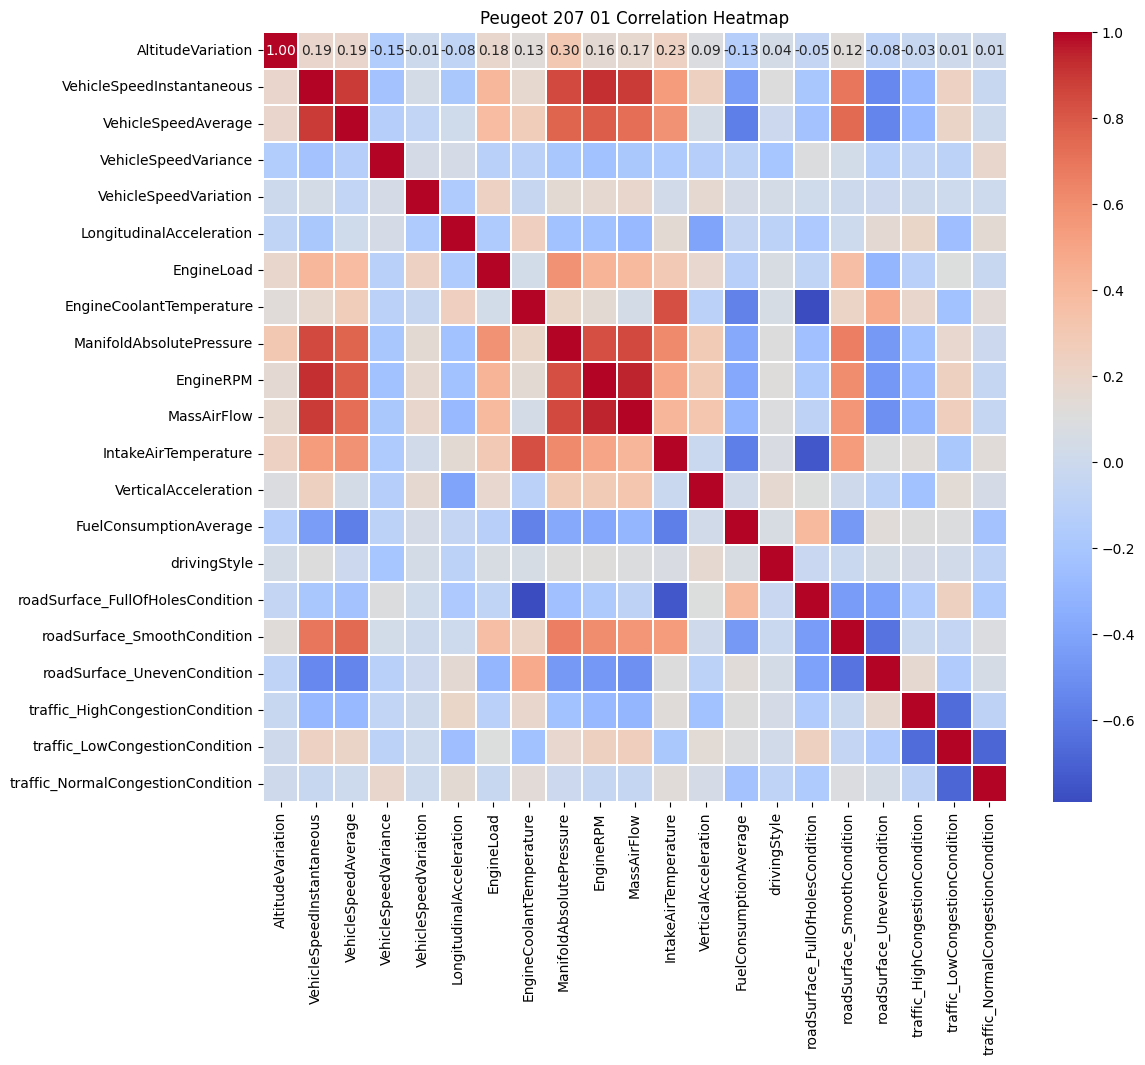

In [202]:
# Correlation heatmap
def plot_correlation_heatmap(df, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
    plt.title(title)
    plt.show()

plot_correlation_heatmap(opel_corsa_01, 'Opel Corsa 01 Correlation Heatmap')
plot_correlation_heatmap(peugeot_207_01, 'Peugeot 207 01 Correlation Heatmap')

<a href="https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e" style="color: black;">**(4) Correlation heatmap** _Bibor Szabo_</a>

## Splitting Data into Training and Testing Sets
Now that the data is properly encoded and scaled, time to split it into training and testing sets for the machine learning model.

<a href="https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/" style="color: black;">**(4) splitting data into training and testing** _GeeksForGeeks_</a>

In [203]:
y_opel_corsa_01 = opel_corsa_01['drivingStyle']
X_opel_corsa_01 = opel_corsa_01.drop('drivingStyle', axis=1)

**Perform the train-test split for Opel Corsa 01**

In [204]:
X_train_opel_corsa_01, X_test_opel_corsa_01, y_train_opel_corsa_01, y_test_opel_corsa_01 = train_test_split(
    X_opel_corsa_01, y_opel_corsa_01, test_size=0.2, random_state=42)

**Repeat for other datasets**

In [205]:
y_opel_corsa_02 = opel_corsa_02['drivingStyle']
X_opel_corsa_02 = opel_corsa_02.drop(columns=['drivingStyle'])
X_train_opel_corsa_02, X_test_opel_corsa_02, y_train_opel_corsa_02, y_test_opel_corsa_02 = train_test_split(
    X_opel_corsa_02, y_opel_corsa_02, test_size=0.2, random_state=42)

y_peugeot_207_01 = peugeot_207_01['drivingStyle']
X_peugeot_207_01 = peugeot_207_01.drop(columns=['drivingStyle'])
X_train_peugeot_207_01, X_test_peugeot_207_01, y_train_peugeot_207_01, y_test_peugeot_207_01 = train_test_split(
    X_peugeot_207_01, y_peugeot_207_01, test_size=0.2, random_state=42)

y_peugeot_207_02 = peugeot_207_02['drivingStyle']
X_peugeot_207_02 = peugeot_207_02.drop(columns=['drivingStyle'])
X_train_peugeot_207_02, X_test_peugeot_207_02, y_train_peugeot_207_02, y_test_peugeot_207_02 = train_test_split(
    X_peugeot_207_02, y_peugeot_207_02, test_size=0.2, random_state=42)

In [206]:
# Reduced parameter grid
param_grid_svm = {
    'C': [1, 10],  # Reduced number of options for faster tuning
    'gamma': [0.1, 1],  # Reduced number of options for faster tuning
    'kernel': ['rbf']
}

# Using n_jobs=-1 to utilize all available CPU cores
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2, n_jobs=-1)

# Example using a specific dataset for tuning
X_train_sample = X_train_opel_corsa_01  
y_train_sample = y_train_opel_corsa_01  
grid_svm.fit(X_train_sample, y_train_sample)

print("Best parameters found for SVM: ", grid_svm.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found for SVM:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


<a href="https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/" style="color: black;">**(5) Grid search for SVM** _GeeksForGeeks_</a>

##  Feature comparison

In [207]:
# Comparing VehicleSpeedInstantaneous and EngineLoad across datasets
features_to_compare = ['VehicleSpeedInstantaneous', 'EngineLoad']

print("Feature Statistics Comparison:")
for feature in features_to_compare:
    print(f"\n{feature} Statistics:")
    for dataset_name, dataset in zip(['Opel Corsa 01', 'Opel Corsa 02', 'Peugeot 207 01', 'Peugeot 207 02'], 
                                      [opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02]):
        print(f"{dataset_name}: Mean = {dataset[feature].mean():.2f}, Std = {dataset[feature].std():.2f}")

Feature Statistics Comparison:

VehicleSpeedInstantaneous Statistics:
Opel Corsa 01: Mean = 0.00, Std = 1.00
Opel Corsa 02: Mean = 0.21, Std = 1.14
Peugeot 207 01: Mean = 0.31, Std = 1.09
Peugeot 207 02: Mean = -0.41, Std = 0.57

EngineLoad Statistics:
Opel Corsa 01: Mean = -0.00, Std = 1.00
Opel Corsa 02: Mean = 0.41, Std = 1.21
Peugeot 207 01: Mean = 0.96, Std = 1.57
Peugeot 207 02: Mean = 0.68, Std = 1.31


## Model Training
After preprocessing and splitting the dataset, now its time to train the models. Compare the three differnt models and compare there performace <br>
**Logistic Regression <br>
Support Vector Machine (SVM) <br>
K-Nearest Neighbors (KNN)** <br>

For each model perform these steps
* Train the model on the training data.
* Make predictions on the test data.
* Evaluate the model's performance using the classification report -> includes precision, recall, f1-score, and accuracy metrics.

### Logistic Regression

In [208]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_opel_corsa_01, y_train_opel_corsa_01)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_opel_corsa_01)

# Evaluate the model
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test_opel_corsa_01, y_pred_log_reg))

# Cross-validation for Logistic Regression
scores_log_reg = cross_val_score(log_reg, X_opel_corsa_01, y_opel_corsa_01, cv=5)
print("Cross-validation scores for Logistic Regression: ", scores_log_reg)
print("Mean cross-validation score: ", scores_log_reg.mean())



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.06      0.10       226
           1       0.85      0.98      0.91      1182

    accuracy                           0.84      1408
   macro avg       0.63      0.52      0.51      1408
weighted avg       0.78      0.84      0.78      1408

Cross-validation scores for Logistic Regression:  [0.81392045 0.81676136 0.81107955 0.81236674 0.81805259]
Mean cross-validation score:  0.8144361391096467


### Support Vector Machine (SVM)

In [209]:
# Hyperparameter Tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2)
grid_svm.fit(X_train_opel_corsa_01, y_train_opel_corsa_01)
print("Best parameters for SVM: ", grid_svm.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.01,

In [210]:
# Cross-validation for SVM with the best parameters
scores_svm = cross_val_score(grid_svm.best_estimator_, X_opel_corsa_01, y_opel_corsa_01, cv=5)
print("Cross-validation scores for SVM: ", scores_svm)
print("Mean cross-validation score: ", scores_svm.mean())

Cross-validation scores for SVM:  [0.81036932 0.81534091 0.78338068 0.79744136 0.82089552]
Mean cross-validation score:  0.8054855592169025


### K-Nearest Neighbors (KNN)

In [211]:
# Hyperparameter Tuning for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, verbose=2)
grid_knn.fit(X_train_opel_corsa_01, y_train_opel_corsa_01)
print("Best parameters for KNN: ", grid_knn.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_

In [212]:
# Cross-validation for KNN with the best parameters
scores_knn = cross_val_score(grid_knn.best_estimator_, X_opel_corsa_01, y_opel_corsa_01, cv=5)
print("Cross-validation scores for KNN: ", scores_knn)
print("Mean cross-validation score: ", scores_knn.mean())

Cross-validation scores for KNN:  [0.76207386 0.76988636 0.74147727 0.77683014 0.80170576]
Mean cross-validation score:  0.7703946783937455


### Support Vector Machine (SVM)
Next, train and evaluate a Support Vector Machine model on each dataset.

In [213]:
datasets = {
    'Opel Corsa 01': (X_train_opel_corsa_01, X_test_opel_corsa_01, y_train_opel_corsa_01, y_test_opel_corsa_01),
    'Opel Corsa 02': (X_train_opel_corsa_02, X_test_opel_corsa_02, y_train_opel_corsa_02, y_test_opel_corsa_02),
    'Peugeot 207 01': (X_train_peugeot_207_01, X_test_peugeot_207_01, y_train_peugeot_207_01, y_test_peugeot_207_01),
    'Peugeot 207 02': (X_train_peugeot_207_02, X_test_peugeot_207_02, y_train_peugeot_207_02, y_test_peugeot_207_02)
}

# For SVM
models_svm = {}
for name, (X_train, X_test, y_train, y_test) in datasets.items():
    svm_model = SVC(C=grid_svm.best_params_['C'], gamma=grid_svm.best_params_['gamma'], kernel='rbf')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"SVM Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    models_svm[name] = svm_model

# Assuming grid_knn holds the best KNN model
models_knn = {}
for name, (X_train, X_test, y_train, y_test) in datasets.items():
    knn_model = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print(f"KNN Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    models_knn[name] = knn_model

SVM Classification Report for Opel Corsa 01:

              precision    recall  f1-score   support

           0       0.87      0.58      0.70       226
           1       0.93      0.98      0.95      1182

    accuracy                           0.92      1408
   macro avg       0.90      0.78      0.83      1408
weighted avg       0.92      0.92      0.91      1408

SVM Classification Report for Opel Corsa 02:

              precision    recall  f1-score   support

           0       0.82      0.62      0.71       158
           1       0.91      0.97      0.94       661

    accuracy                           0.90       819
   macro avg       0.87      0.79      0.82       819
weighted avg       0.90      0.90      0.90       819

SVM Classification Report for Peugeot 207 01:

              precision    recall  f1-score   support

           0       0.88      0.39      0.54       115
           1       0.96      1.00      0.98      1525

    accuracy                           0.95

**calculate and print the accuracy score**

### K-Nearest Neighbors (KNN)

Finally, we apply the K-Nearest Neighbors algorithm.

In [214]:
from sklearn.neighbors import KNeighborsClassifier

models_knn = {}
for name, (X_train, X_test, y_train, y_test) in datasets.items():
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    print(f"KNN Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    models_knn[name] = knn_model


KNN Classification Report for Opel Corsa 01:

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       226
           1       0.93      0.95      0.94      1182

    accuracy                           0.90      1408
   macro avg       0.82      0.78      0.80      1408
weighted avg       0.89      0.90      0.89      1408

KNN Classification Report for Opel Corsa 02:

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       158
           1       0.92      0.94      0.93       661

    accuracy                           0.89       819
   macro avg       0.82      0.80      0.81       819
weighted avg       0.88      0.89      0.88       819

KNN Classification Report for Peugeot 207 01:

              precision    recall  f1-score   support

           0       0.77      0.52      0.62       115
           1       0.96      0.99      0.98      1525

    accuracy                           0.96

In [215]:


# Define parameter range for GridSearchCV for the SVM model
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}

grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2)
grid_svm.fit(X_train_opel_corsa_01, y_train_opel_corsa_01)

# Print the best parameters and the best score
print("Best parameters found for SVM: ", grid_svm.best_params_)
print("Best score found for SVM: ", grid_svm.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ...................

 ### Training the KNN model on each dataset, making predictions, and calculating accuracy

In [216]:
# Train KNN model for Opel Corsa 01
knn_model = KNeighborsClassifier(n_neighbors=5)  

# Fit model
knn_model.fit(X_train_opel_corsa_01, y_train_opel_corsa_01)

# Make predictions
y_pred_knn_opel_corsa_01 = knn_model.predict(X_test_opel_corsa_01)

# Calculate accuracy
accuracy_knn_opel_corsa_01 = accuracy_score(y_test_opel_corsa_01, y_pred_knn_opel_corsa_01)
print(f"Accuracy for KNN on Opel Corsa 01: {accuracy_knn_opel_corsa_01:.2f}")


Accuracy for KNN on Opel Corsa 01: 0.90


In [217]:
# Train KNN model for Opel Corsa 02
knn_model.fit(X_train_opel_corsa_02, y_train_opel_corsa_02)

# Make predictions
y_pred_knn_opel_corsa_02 = knn_model.predict(X_test_opel_corsa_02)

# Calculate accuracy
accuracy_knn_opel_corsa_02 = accuracy_score(y_test_opel_corsa_02, y_pred_knn_opel_corsa_02)
print(f"Accuracy for KNN on Opel Corsa 02: {accuracy_knn_opel_corsa_02:.2f}")


Accuracy for KNN on Opel Corsa 02: 0.89


In [218]:
# Train KNN model for Peugeot 207 01
knn_model.fit(X_train_peugeot_207_01, y_train_peugeot_207_01)

# Make predictions
y_pred_knn_peugeot_207_01 = knn_model.predict(X_test_peugeot_207_01)

# Calculate accuracy
accuracy_knn_peugeot_207_01 = accuracy_score(y_test_peugeot_207_01, y_pred_knn_peugeot_207_01)
print(f"Accuracy for KNN on Peugeot 207 01: {accuracy_knn_peugeot_207_01:.2f}")


Accuracy for KNN on Peugeot 207 01: 0.96


In [219]:
# Train KNN model for Peugeot 207 02
knn_model.fit(X_train_peugeot_207_02, y_train_peugeot_207_02)

# Make predictions
y_pred_knn_peugeot_207_02 = knn_model.predict(X_test_peugeot_207_02)

# Calculate accuracy
accuracy_knn_peugeot_207_02 = accuracy_score(y_test_peugeot_207_02, y_pred_knn_peugeot_207_02)
print(f"Accuracy for KNN on Peugeot 207 02: {accuracy_knn_peugeot_207_02:.2f}")


Accuracy for KNN on Peugeot 207 02: 0.97

In [220]:
# Calculate individual accuracies
accuracy_knn_opel_corsa_01 = accuracy_score(y_test_opel_corsa_01, y_pred_knn_opel_corsa_01)
accuracy_knn_opel_corsa_02 = accuracy_score(y_test_opel_corsa_02, y_pred_knn_opel_corsa_02)
accuracy_knn_peugeot_207_01 = accuracy_score(y_test_peugeot_207_01, y_pred_knn_peugeot_207_01)
accuracy_knn_peugeot_207_02 = accuracy_score(y_test_peugeot_207_02, y_pred_knn_peugeot_207_02)

# Assuming equal weight, average the accuracies
average_accuracy_knn = (accuracy_knn_opel_corsa_01 + accuracy_knn_opel_corsa_02 + accuracy_knn_peugeot_207_01 + accuracy_knn_peugeot_207_02) / 4
print(f"Average Accuracy for KNN across datasets: {average_accuracy_knn:.2f}")

Average Accuracy for KNN across datasets: 0.93


In [221]:
print(f"Summary of KNN Accuracies:")
print(f"Opel Corsa 01: {accuracy_knn_opel_corsa_01:.2f}")
print(f"Opel Corsa 02: {accuracy_knn_opel_corsa_02:.2f}")
print(f"Peugeot 207 01: {accuracy_knn_peugeot_207_01:.2f}")
print(f"Peugeot 207 02: {accuracy_knn_peugeot_207_02:.2f}")

Summary of KNN Accuracies:
Opel Corsa 01: 0.90
Opel Corsa 02: 0.89
Peugeot 207 01: 0.96
Peugeot 207 02: 0.97


## Model Performance Comparison

c:\Users\ronan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ronan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ronan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\ronan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

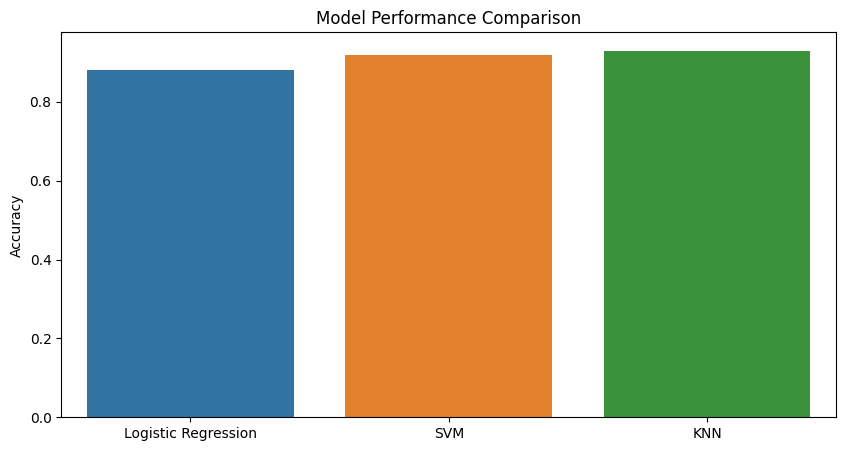

In [222]:
accuracy_log_reg = 0.88  
accuracy_svm = 0.92  
average_accuracy_knn = 0.93

model_accuracies = {
    'Logistic Regression': accuracy_log_reg,  # The calculated accuracy for your logistic regression model
    'SVM': accuracy_svm,  # The calculated accuracy for your SVM model
    'KNN': average_accuracy_knn  # The average accuracy calculated for KNN
}

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()


<a href="https://matplotlib.org/stable/tutorials/pyplot.html" style="color: black;">**(6) Simple Catagorical plotting** _Mathplotlip_</a>

## <span style="color: black;">References</span>

1. https://dev.to/jaynwabueze/mastering-data-preprocessing-for-machine-learning-in-python-a-comprehensive-guide-1bdh <span style="color: black;">Mastering Data Preprocessing for Machine Learning in Python: Jay Codes on DEV Community</span>
2. https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/ <span style="color: black;">Plotting Histogram in Python using Matplotlib</span>
3. https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e <span style="color: black;">Correlation heatmap</span>
4. https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/ <span style="color: black;">splitting data into training and testing</span>
5. https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/ <span style="color: black;">Grid search for SVM</span>
6. https://matplotlib.org/stable/tutorials/pyplot.html <span style="color: black;">Simple Catagorical plotting</span>
7. https://www.globaltechcouncil.org/machine-learning/logistic-regression-vs-k-nearest-neighbours-vs-support-vector-machine/
 <span style="color: black;">Logistic Regression VS K-Nearest Neighbours VS Support Vector Machine</span>





## <span style="color: red;">Videos</span>

1. https://www.youtube.com/watch?v=JUYDbqj4RHA <span style="color: red;">Choosing bettween LR, SVM & KNN</span>